In [2]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier # 분류
from sklearn.neighbors import KNeighborsRegressor  # 회귀-예측
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [3]:
# numpy의 구조로 변환
perch_length=np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
)

perch_length

array([ 8.4, 13.7, 15. , 16.2, 17.4, 18. , 18.7, 19. , 19.6, 20. , 21. ,
       21. , 21. , 21.3, 22. , 22. , 22. , 22. , 22. , 22.5, 22.5, 22.7,
       23. , 23.5, 24. , 24. , 24.6, 25. , 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28. , 28.7, 30. , 32.8, 34.5, 35. , 36.5, 36. , 37. , 37. ,
       39. , 39. , 39. , 40. , 40. , 40. , 40. , 42. , 43. , 43. , 43.5,
       44. ])

In [4]:
# perch_length=[8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
#      21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
#      22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
#      27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
#      36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
#      40.0, 42.0, 43.0, 43.0, 43.5, 44.0]

# perch_weight = [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
#      110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
#      130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
#      197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
#      514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
#      820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
#      1000.0, 1000.0]

# df = pd.DataFrame([perch_length,perch_weight])
# df = df.T
# df

Text(0, 0.5, '무게')

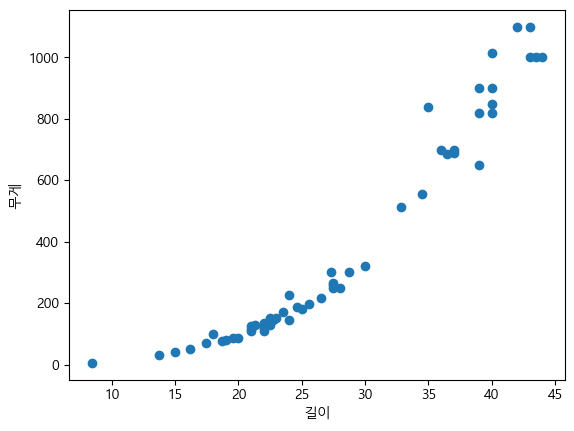

In [5]:
# 산점도로 출력하시오.
# x축은 길이 df[0], y축은 무게 df[1]
# plt.scatter(df[0],df[1])
plt.scatter(perch_length,perch_weight)
plt.xlabel('길이')
plt.ylabel("무게")


머신러닝 구현
1. 데이터 전처리 - Nan,0,단위처리, 훈련세트,테스트세트 분리
2. 데이터 학습시키기
3. 데이터 예측하기 - 평균 절대값 오차
4. 예측값 구하기

In [6]:
# 머신러닝 구현
# 1. 데이터 전처리 - Nan,0,단위처리, 훈련세트,테스트세트 분리
train_input,test_input,train_target,test_target = train_test_split(
    perch_length,perch_weight
)
train_input

array([37. , 18.7, 22. , 19. , 36.5, 40. , 36. , 21. , 27.5, 21. , 22.5,
       23. , 15. , 27.5, 24.6, 23.5, 27.3, 21.3, 40. , 17.4, 28.7, 32.8,
       16.2, 22. , 24. , 18. , 22. ,  8.4, 30. , 40. , 43.5, 37. , 22. ,
       39. , 28. , 34.5, 26.5, 21. , 40. , 25. , 42. , 39. ])

In [7]:
train_input

array([37. , 18.7, 22. , 19. , 36.5, 40. , 36. , 21. , 27.5, 21. , 22.5,
       23. , 15. , 27.5, 24.6, 23.5, 27.3, 21.3, 40. , 17.4, 28.7, 32.8,
       16.2, 22. , 24. , 18. , 22. ,  8.4, 30. , 40. , 43.5, 37. , 22. ,
       39. , 28. , 34.5, 26.5, 21. , 40. , 25. , 42. , 39. ])

In [8]:
# 총개수 : 56
train_input.shape   # 42
# test_input.shape  # 14

(42,)

In [9]:
arr1 = np.array([1,2,3,4])
arr1 = arr1.reshape(2,2)# (o,x) x부터 맞추고 o 진행 o*x = arr1 갯수와 같음
arr1
# 틀을 만든 후 데이터를 입력하는것이 더 빠르다

array([[1, 2],
       [3, 4]])

In [10]:
# 알고리즘 구현을 위한 2차원 행렬로 변경.
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [11]:
train_input.shape
test_input.shape

(14, 1)

In [12]:
# 데이터 학습시키기
knr = KNeighborsRegressor()
knr.fit(train_input,train_target)

KNeighborsRegressor()

In [13]:
# 데이터 예측하기
# 예측의 오차 범위 - 평균 절대값 오차
from sklearn.metrics import mean_absolute_error
predict = knr.predict(test_input)
# 무게 예측
print("예측값 : ",predict)

예측값 :  [101.6 130.  967.  122.   67.9 130.  967.  182.6 101.6 841.  666.2 967.
 255.6 222.2]


In [14]:
perch_weight

array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
        685. ,  700. ,  700. ,  690. ,  900. ,  650. ,  820. ,  850. ,
        900. , 1015. ,  820. , 1100. , 1000. , 1100. , 1000. , 1000. ])

In [15]:
# 예측한 값과 실제값의 평균 절대값 오차
test_mean = mean_absolute_error(test_target,predict)
print("오차범위 : ",test_mean)

오차범위 :  44.36428571428571


In [16]:
# 예측률 측정하기: test_input데이터 검증
score = knr.score(test_input,test_target)
print("test예측률 : ",score) # 0.9903535228913749
# 이상하다, 테스트가 > 트레이닝보다 높다;; 문제가 있는듯 하다.

test예측률 :  0.9745669238585377


In [17]:
# 실제 훈련, train데이터의 예측률은 어느정도인가?
score2 = knr.score(train_input,train_target)
print("train예측률 : ",score2) # 0.9757267984010775

train예측률 :  0.9745625060203892


그래프 구성

In [18]:
# 이웃의 개수를 축소 5에서 3으로 변경
# 과소적합 n_neighbors 줄입
# 과대적합 n_neighbors 늘림
knr.n_neighbors = 3
# 데이터 훈련 다시 시키기
knr.fit(train_input,train_target)
# train 데이터 예측
knr.score(train_input,train_target)

0.9841687500018267

In [19]:
knr.score(test_input,test_target)

0.9662928258723279

In [20]:
perch_length.shape

(56,)

In [21]:
arr = [[i]for i in range(5,45+1)] # x축의 좌표

In [22]:
np.arange(4,45)# 4~ 44까지 배열

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44])

In [23]:
np.arange(4,45).reshape(-1,1) # 배열을 2차원 행렬변경

array([[ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44]])

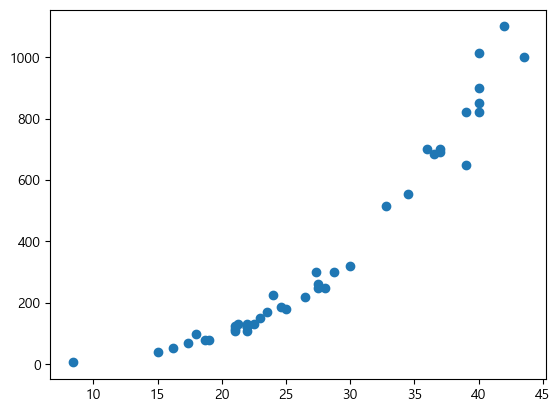

In [24]:
plt.scatter(train_input,train_target)

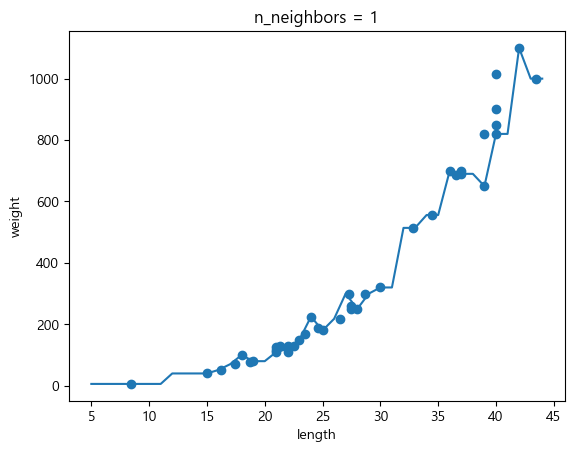

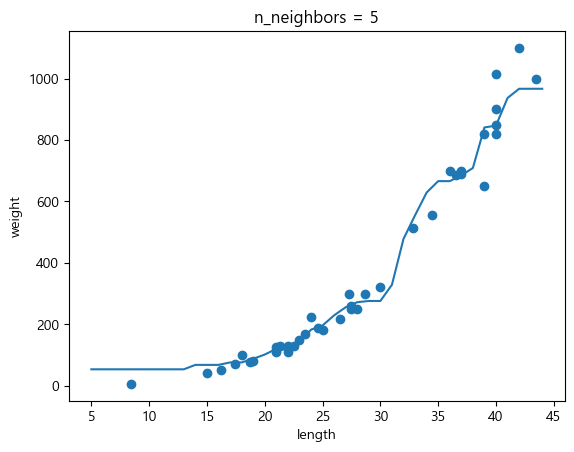

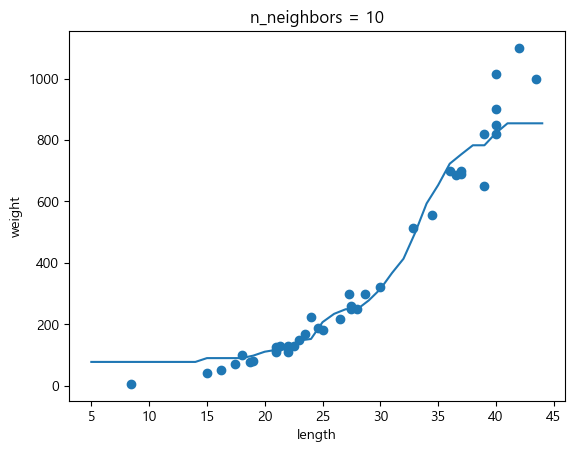

In [25]:
krn = KNeighborsRegressor()
x = np.arange(5,45).reshape(-1,1)
for n in [1,5,10]: # n_neighbors = 1,5,10 예측률을 표시
    knr.n_neighbors = n
    # 데이터 훈련 다시 시키기
    knr.fit(train_input,train_target)
    
    # 배열로 만든 길이를 가지고 예측무게 산출
    predict = knr.predict(x)
    
    # x,y축의 형태가 다 만들어짐..;;
    # 훈련세트의 값
    plt.scatter(train_input,train_target)
    plt.plot(x,predict)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show() # 하나의 그래프가 분리되어서 보여짐
    